In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
from sklearn.preprocessing import StandardScaler#표준화(평균을 기준)
from sklearn.preprocessing import MinMaxScaler#정규화
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from IPython.display import Image
fm._rebuild()
fm.get_fontconfig_fonts()

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = '../NanumSquareRoundEB.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)



In [8]:
df = pd.read_csv('../csv-data/기계마모.csv')

In [9]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [73]:
df['Machine failure'].value_counts()

0    9661
1     339
Name: Machine failure, dtype: int64

In [10]:
df.drop(columns=['UDI', 'Product ID', 'Rotational speed [rpm]','Air temperature [K]', 'Process temperature [K]','Torque [Nm]','RNF'], inplace=True)

In [11]:
col0=df.columns[0:2].to_list()
col1=df.columns[2:3].to_list()
col2=df.columns[3:].to_list()
new_col=col0+col2+col1
df=df[new_col]

In [12]:
col1

['Machine failure']

In [13]:
df.iloc[:,-1]

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Machine failure, Length: 10000, dtype: int64

In [14]:
a= set(df['Type'].values)
value= list(a)
value

['M', 'H', 'L']

In [15]:
encoder=LabelEncoder()
encoder.fit(value) 
df['Type']=encoder.transform(df['Type'])
df['Type'] = df['Type'].astype('category')

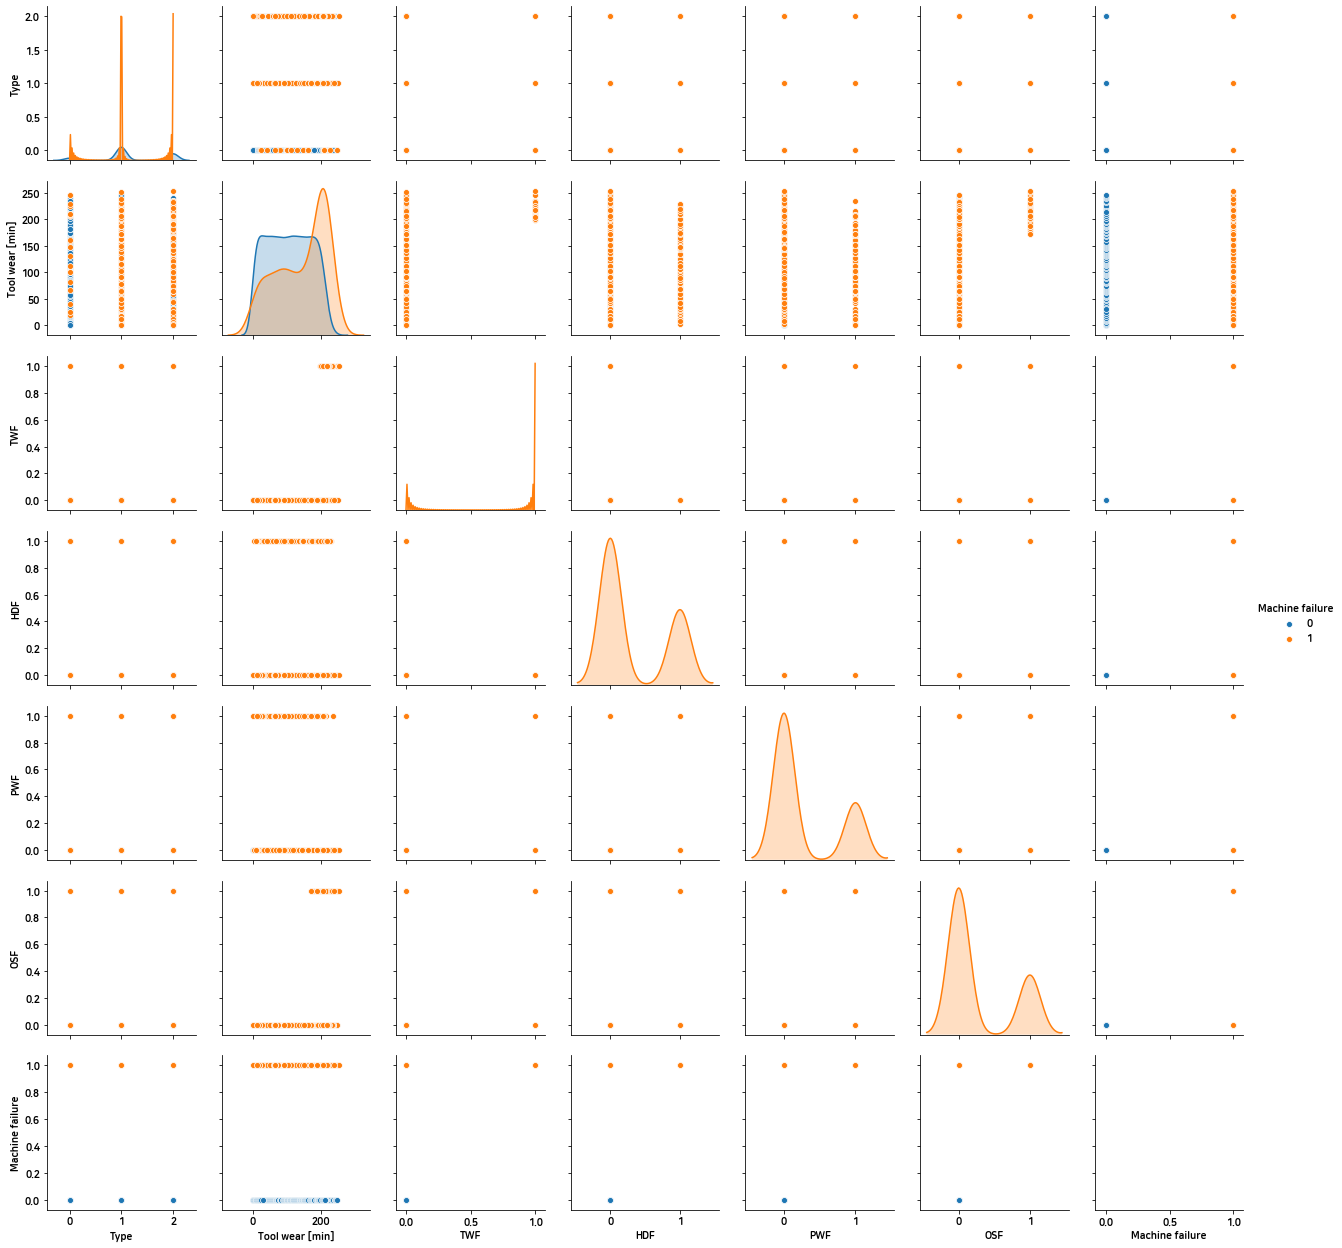

In [16]:
sns.pairplot(df, hue='Machine failure')

In [17]:
dd= df.corr()
df.info()
cols = dd.columns
cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
Type               10000 non-null category
Tool wear [min]    10000 non-null int64
TWF                10000 non-null int64
HDF                10000 non-null int64
PWF                10000 non-null int64
OSF                10000 non-null int64
Machine failure    10000 non-null int64
dtypes: category(1), int64(6)
memory usage: 478.7 KB


Index(['Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF', 'Machine failure'], dtype='object')

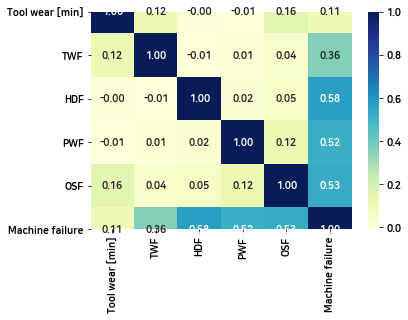

In [18]:
sns.heatmap(dd.values,
            cbar = True,
           annot=True, 
            cmap="YlGnBu",
            square=True, 
            fmt = '.2f',
            xticklabels=cols,
            yticklabels=cols
           )

In [19]:
df

,Type,Tool wear [min],TWF,HDF,PWF,OSF,Machine failure
0,2,0,0,0,0,0,0
1,1,3,0,0,0,0,0
2,1,5,0,0,0,0,0
3,1,7,0,0,0,0,0
4,1,9,0,0,0,0,0
...,...,...,...,...,...,...,...
9995,2,14,0,0,0,0,0
9996,0,17,0,0,0,0,0
9997,2,22,0,0,0,0,0
9998,0,25,0,0,0,0,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
Type               10000 non-null category
Tool wear [min]    10000 non-null int64
TWF                10000 non-null int64
HDF                10000 non-null int64
PWF                10000 non-null int64
OSF                10000 non-null int64
Machine failure    10000 non-null int64
dtypes: category(1), int64(6)
memory usage: 478.7 KB


In [21]:
#train , test split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2, random_state=3)

#포지션이 target. 

In [77]:
y_train.value_counts()
# y_test.value_counts()

0    7741
1     259
Name: Machine failure, dtype: int64

### 모델 선정=>cross-valication
KNN, SVM, DECISIONTREE 중 교차 검증으로 ... 


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [23]:
df_clf = DecisionTreeClassifier(random_state=11)
knn_clf = KNeighborsClassifier()
random_clf = RandomForestClassifier(random_state=11)
svc_clf = SVC()
how = [df_clf, knn_clf,random_clf, svc_clf]

In [24]:
def print_metrics(model, x, y,m=10):
    
    scores = cross_val_score(model, x,y, cv=m)
    acc_mean = np.mean(scores)
    print("교차검증결과: {}".format(scores))
    print("교차검증결과: {:.2f}".format(np.mean(scores)))
    
    return scores, acc_mean
    

In [44]:
model_names=[]
result=[]
result_mean=[]
for i in how:
    a=str(i)
    
    print("-----------------"+a[: a.find("(")]+"---------------")
    gg=print_metrics(i, X_train, y_train, 10)
    model_names.append(a[: a.find("(")])
    result.append(gg[0])
    result_mean.append(gg[1])
    
print(result)
print(result_mean)
print(model_names)

-----------------DecisionTreeClassifier---------------
교차검증결과: [1.      1.      1.      0.995   0.99875 1.      1.      1.      0.99875
 1.     ]
교차검증결과: 1.00
-----------------KNeighborsClassifier---------------
교차검증결과: [0.97253433 0.97       0.96875    0.97       0.97375    0.97125
 0.96875    0.97125    0.96875    0.97246558]
교차검증결과: 0.97
-----------------RandomForestClassifier---------------
교차검증결과: [1.      1.      1.      0.995   0.99875 1.      1.      1.      0.99875
 1.     ]
교차검증결과: 1.00
-----------------SVC---------------
교차검증결과: [0.98002497 0.97625    0.98       0.9775     0.97875    0.97375
 0.96875    0.975      0.97375    0.9787234 ]
교차검증결과: 0.98
[array([1.     , 1.     , 1.     , 0.995  , 0.99875, 1.     , 1.     ,
       1.     , 0.99875, 1.     ]), array([0.97253433, 0.97      , 0.96875   , 0.97      , 0.97375   ,
       0.97125   , 0.96875   , 0.97125   , 0.96875   , 0.97246558]), array([1.     , 1.     , 1.     , 0.995  , 0.99875, 1.     , 1.     ,
       1.     , 0.

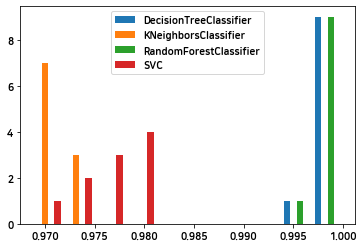

In [26]:
plt.hist(result, label=model_names)
plt.legend()

### 하이퍼 파라메터=>grid search

In [45]:
def grid_search(model, params, k=5):
    gs= GridSearchCV(model, params, cv=k)
    gs.fit(X_train, y_train)
    print(gs)
    print("Best Parameters : ", gs.best_params_)
    print("Best Score : ", gs.best_score_)
    print("Best Test Score : ", gs.score(X_test, y_test))
    return gs

In [46]:
grid_params={
    "criterion":["gini", "entropy"], "max_depth":[3,5,7,9], "random_state": [1,3,5]
}

In [48]:
grid_search(df_clf, grid_params, k=5)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=11,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9], 'random_state': [1, 3, 5]},

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=11,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9], 'random_state': [1, 3, 5]},

In [52]:
# best_model=RandomForestClassifier(criterion= 'gini', max_depth= 5, random_state= 1)
# best_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [49]:
best_model=DecisionTreeClassifier(criterion= 'gini', max_depth= 5, random_state= 1)
best_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [53]:
best_model.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [54]:
#정확도 체크, acc, recall, precision, f1-score  ===> confusionMatrix

In [55]:
pred=None
def print_test_metrics(model, X_test):
    global pred
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    print('*** Test Accuracy *** \n   {}'.format(model.score(X_test, y_test)))
    print('\n*** Confusion Matrix *** \n', confusion_matrix(y_test, model.predict(X_test)))
    print('*** Confusion Matrix(precision) ***')
    print(precision_score(y_test, pred, average='macro'))
    print('***classification re(precision) ***')
    print(classification_report(y_test, pred))

In [56]:
print_test_metrics(best_model, X_test)

*** Test Accuracy *** 
   0.9985

*** Confusion Matrix *** 
 [[1920    0]
 [   3   77]]
*** Confusion Matrix(precision) ***
0.999219968798752
***classification re(precision) ***
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1920
           1       1.00      0.96      0.98        80

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000



In [57]:
# 실제(no failure)--> 예측(no failure, failure),   실제(failure)--> 예측(no failure, failure),   
# 4가지 경우를 표형태로 정리 해주는 것이 confushion_matrix
#binary classfication인경우 보기 괜찮은데 ... multi classfication 인경우 불편하다.
## --- >classification_report 사용

## recall
#### 실제 no failure중에서, 예측한 값들을 보면 실제  no failure로 100% 정확하게 예측해냈고,   failure로 예측한 것은 없다.
####  실제  failure중에서, 예측한 값들을 보면 실제  failure로 예측한 것이 96%이고,  no failure로 예측한 것이 4%이다.

## precision
####  예측한 no failure중에서 실제 91%가 no failure였고,failure는 9%이다.
####  예측한 failure중에서 실제 0.0015 가 failure였고, no failure는 없었다.

In [58]:
type(y_test)
pred
result_df = pd.DataFrame({
    'predict_result' : pred,
    'y_test' : y_test
})
result_df

,predict_result,y_test
5876,0,0
6555,0,0
1448,0,0
3351,0,0
231,0,0
...,...,...
869,0,0
2928,0,0
8436,0,0
6312,0,0


In [78]:
encoder2 = LabelEncoder()
col = result_df.columns
col
for c in col:
    result_df[c] = encoder2.fit_transform(result_df[c])
result_df

,predict_result,y_test
5876,0,0
6555,0,0
1448,0,0
3351,0,0
231,0,0
...,...,...
869,0,0
2928,0,0
8436,0,0
6312,0,0


In [79]:
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
y_pred_proba
for_roc_df = pd.DataFrame({
    'y_test' : y_test,
    'y_pred_proba' : y_pred_proba
})
for_roc_df

,y_test,y_pred_proba
5876,0,0.002526
6555,0,0.001270
1448,0,0.001637
3351,0,0.002526
231,0,0.002526
...,...,...
869,0,0.002526
2928,0,0.001637
8436,0,0.010811
6312,0,0.001637


In [61]:
for_roc_df['y_test'] = encoder.fit_transform(for_roc_df['y_test'])
for_roc_df

,y_test,y_pred_proba
5876,0,0.002526
6555,0,0.001270
1448,0,0.001637
3351,0,0.002526
231,0,0.002526
...,...,...
869,0,0.002526
2928,0,0.001637
8436,0,0.010811
6312,0,0.001637


In [62]:
fpr, tpr, thresholds = roc_curve(for_roc_df.y_test,for_roc_df.y_pred_proba)

roc = pd.DataFrame({
'FPR': fpr, 
'TPR': tpr, 
'Threshold': thresholds
})
roc

,FPR,TPR,Threshold
0,0.000000,0.0000,2.000000
1,0.000000,0.3500,1.000000
2,0.000000,0.3625,0.909524
3,0.000000,0.4500,0.900982
4,0.000000,0.4750,0.893333
5,0.000000,0.5000,0.824370
6,0.000000,0.5625,0.803318
7,0.000000,0.7000,0.801684
8,0.000000,0.7500,0.767044
9,0.000000,0.7625,0.732451


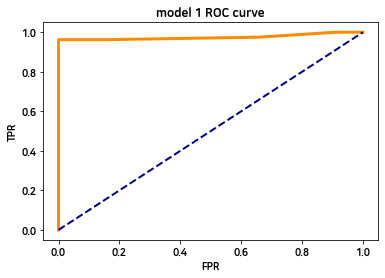

In [80]:
plt.plot(fpr, tpr,   color="darkorange", lw=3)
plt.title('model 1 ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR');

plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")